# 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 只取其中一个特征来进行简单线性回归的试验

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

我们只取第5个特征RM

In [5]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [6]:
np.shape(x)

(506,)

In [7]:
y = boston.target
np.shape(y)

(506,)

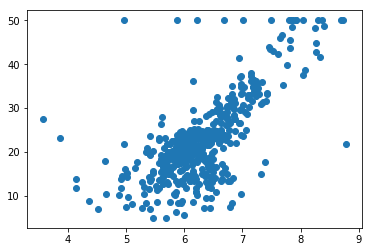

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
np.max(y)

从上图中可以看到，有若干点的y轴坐标都是50，它们有可能是各种原因下，超出统计范围后给出的最大值，因此我们需要把这些点去掉。

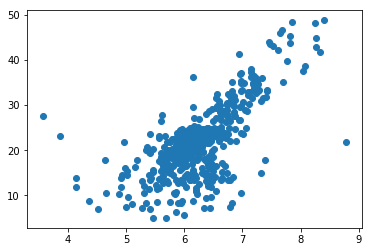

In [10]:
x = x[y<50.0]
y = y[y<50.0]

plt.scatter(x,y)
plt.show()

### 使用简单线性回归法

In [11]:
from c1_knn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, seed=666)

In [12]:
np.shape(x_train)

(392,)

In [13]:
np.shape(x_test)

(98,)

In [14]:
from c2_linear_regression.simple_linear_regression import SimpleLinearRegression
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [15]:
reg.a_

7.8608543562689563

In [16]:
reg.b_

-27.45934280670555

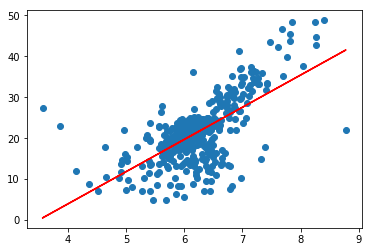

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [18]:
y_predict = reg.predict(x_test)

#### MSE

In [19]:
mse_test = np.sum((y_predict - y_test)**2)/len(y_test)
mse_test

24.15660213438743

In [20]:
mse_test_2 = (y_predict - y_test).dot(y_predict - y_test)/len(y_test)
mse_test_2

24.15660213438743

#### RMSE

In [21]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846634

#### MAE

In [22]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

### scikit-learn中的MSE和MAE

In [23]:
from sklearn.metrics.scorer import mean_squared_error
from sklearn.metrics.scorer import mean_absolute_error

In [24]:
mean_squared_error(y_test, y_predict)

24.15660213438743

In [25]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### R Square

In [26]:
from playML.metrics import r2_score

In [27]:
r2_score(y_test, y_predict)

0.61293168039373236

### scikit-learn中的R Square

In [28]:
from sklearn.metrics.scorer import r2_score as r2s

In [29]:
r2s(y_test,y_predict)

0.61293168039373236